In [1]:
import foregrounds_utils as fgs

import plottingconventions as pltconv

%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
nu0 = 145*1e9

lmin, lmax = 1, 8000

F = fgs.Foregrounds(nu1 = nu0, nu2 = nu0)

In [49]:
ells = np.arange(lmin, lmax, 1)

In [50]:
dust = F.fgalacticDust(ells)
cib = F.fCIB(ells)
tsz = F.ftSZ(ells)
ksz = F.fkSZ(ells)
radio = F.fradioPoisson(ells)
ucmb = F.funlensedTT(ells)
lcmb = F.flensedTT(ells)

elements = [ucmb, lcmb, tsz, ksz, radio, cib, dust]

In [51]:
ell, nl27, nl39, nl93, nl145, nl225, nl280, nl27x39, nl93x145, nl225x280 = np.loadtxt('V3_calc_mode2_fsky0.4_defaultdist_noise_LAT_T.txt', unpack = True)

In [52]:
allelements = [lcmb, tsz, ksz, radio, cib, dust, np.interp(ells, ell, nl145)]
allelements = np.array(allelements)
totalcmb = allelements.sum(axis = 0)

totalnoisecmb = allelements[1:].sum(axis = 0)

In [56]:
#ells, lcmb, tsz, ksz, radio, cib, dust, np.interp(ells, ell, nl145), totalcmb, totalnoisecmb
allelementstosave = np.c_[ells, np.array(allelements).T, totalcmb, totalnoisecmb]

In [57]:
allelementstosave.shape

(7999, 10)

In [58]:
np.save('input_cmb_145.npy', allelementstosave)

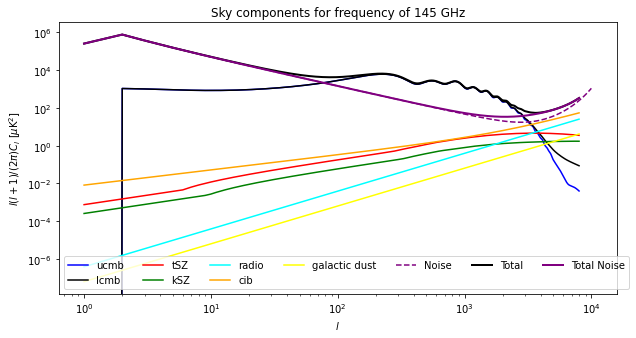

In [53]:
plt.figure(figsize = (10, 5))
get_factor = lambda l: l*(l+1)/(2*np.pi)
factor = get_factor(ells)
for element, component in zip(elements, pltconv.COMPONENTS):
    plt.plot(ells, factor*element, label = component, color = pltconv.get_color_for_sky_component(component))
plt.plot(ell, nl145*get_factor(ell), color = 'purple', label = f'Noise', ls = '--')
plt.plot(ells, totalcmb*factor, color = 'black', lw = 2, label = 'Total')
plt.plot(ells, totalnoisecmb*factor, color = 'purple', lw = 2, label = 'Total Noise')

plt.legend(ncol = len(elements))
plt.title(f'Sky components for frequency of {int(nu0/1e9)} GHz')
plt.ylabel('$l(l+1)/(2\pi)C_l\ [\mu \mathrm{K}^2]$')
plt.xlabel('$l$')
plt.yscale('log')
plt.xscale('log')
plt.show()